THIS IS THE ENTIRE FTS (FROM INPUT TO OUTPUT). 'Global' refers to the coordinate system I have placed the model FTS in, which has an origin in between the two first CENTER ellipsoids. The ellipsoids lie opposite each other across the x axis, and light travels down the x axis by reflecting between the two sides. 'Local' refers to a coordinate system for each ellipsoid where the origin is the center of the ellipsoid. There are two paths that light can travel due to polarizers that split the light. The first path is E10, E8, E3, E2, E6, E7. The second path is E9, E1,E4,E5.
The path shown here is path 1. Polarizers are not included in this. 

This is where I will first try to put the mirror (and so deal with split paths).

Mira



In [4]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun_formir import *
from random import uniform
import random
import matplotlib
%matplotlib auto
#%matplotlib inline

Using matplotlib backend: MacOSX


In [2]:
# ALL STARTING INFORMATION ABOUT THE FTS

originG = [0,0,0] # the global origin
thetG = [0,0,0] # rotation with respect to itself aka 0,0,0
origin1 = [0,-128,0] #x,y (ellipse1)
origin2 = [64.15,-128,0] #x,y (ellipse2)
origin3 = [0,128,0] #x,y (ellipse3)
origin4 = [64.15,128,0] #x,y  (ellipse4)
origin5 = [128.3,-120.501,0] # (ellipse5)
origin6 = [128.3,120.501,0] # (ellipse6)
origin7 = [160.375,-7.5,40]
origin8 = [-64.15,-120.501,0]
origin9 = [-64.15,120.501,0]
origin10 = [-96.225,7.5,-40]


coeffellipse7 = [164.645,99.8,130.95] #for ellipse 7
coeffellipse56 = [256.65,248.39,64.58]  #for ellipses 5&6&8&9
coeffellipse = [263.9,256,64.15] #for center ellipses

thet = [0,0,0] #A
thet5 = [0,0,.1164] #testing
thet6 = [0,0,-.1164] #testing
thet7 = [0,.319422,1.3106]
thet10 = [0,.310422,-1.3106] #negative of thet7?
# NOW BUILDING ALL OF THE ELLIPSOIDS 
# SELECTING CORRESPONDING PARTS

#CENTER ELLIPSES
X1i,Y1i,Z1i,X2i,Y2i,Z2i = FTSEC(100,np.pi/8, coeffellipse, 64.15, 'pos') #LOBAL
X1ni,Y1ni,Z1ni,X2ni,Y2ni,Z2ni = FTSEC(100,np.pi/8, coeffellipse, 64.15, 'neg') #LOCAL
Xset1, Yset1, Zset1 = SR2(32.07, X1i,Y1i,Z1i, originG) #SELECTED LOCAL
Xset2, Yset2, Zset2 = SR2(32.07, X2i, Y2i, Z2i, originG) #SELECTED LOCAL
Xset1n, Yset1n, Zset1n = SR2(32.07, X1ni,Y1ni,Z1ni, originG) #SELECTED LOCAL
Xset2n, Yset2n, Zset2n = SR2(32.07, X2ni, Y2ni, Z2ni, originG) #SELECTED LOCAL
#ELLIPSE 1
X1,Y1,Z1 = transformLG(Xset1,Yset1,Zset1,origin1,thet) #GLOBAL
X2,Y2,Z2 = transformLG(Xset2,Yset2,Zset2,origin1,thet) #GLOBAL
center1,range1 = xrangeGL7(X1,Y1,Z1,X2,Y2,Z2,origin1,thet)
#ELLIPSE 2
X3,Y3,Z3 = transformLG(Xset1,Yset1,Zset1,origin2,thet) #GLOBAL
X4,Y4,Z4 = transformLG(Xset2,Yset2,Zset2,origin2,thet) #GLOBAL
center2,range2 = xrangeGL7(X3,Y3,Z3,X4,Y4,Z4,origin2,thet)
#ELLIPSE 3
X1n,Y1n,Z1n = transformLG(Xset1n,Yset1n,Zset1n,origin3,thet) #GLOBAL
X2n,Y2n,Z2n = transformLG(Xset2n,Yset2n,Zset2n,origin3,thet) #GLOBAL
center3,range3 = xrangeGL7(X1n,Y1n,Z1n,X2n,Y2n,Z2n,origin3,thet)
#ELLIPSE 4
X3n,Y3n,Z3n = transformLG(Xset1n,Yset1n,Zset1n,origin4,thet) #GLOBAL
X4n,Y4n,Z4n = transformLG(Xset2n,Yset2n,Zset2n,origin4,thet) #GLOBAL
center4,range4 = xrangeGL7(X3n,Y3n,Z3n,X4n,Y4n,Z4n,origin4,thet)


#ELLIPSE 5&6
X5i,Y5i,Z5i,X6i,Y6i,Z6i = FTSEC(100,np.pi/8, coeffellipse56, 170, 'pos') #LOCAL
X5ni,Y5ni,Z5ni,X6ni,Y6ni,Z6ni = FTSEC(100,np.pi/8, coeffellipse56, 170, 'neg') #LOCAL
#ELLIPSE 5
Xset5, Yset5, Zset5= transformLG(X5i,Y5i,Z5i,origin5,thet5) #GLOBAL
Xset6, Yset6, Zset6 = transformLG(X6i,Y6i,Z6i,origin5,thet5) #GLOBAL
X5,Y5,Z5 = SR2(32.07, Xset5,Yset5,Zset5, origin5) #SELECTED GLOBAL
X6,Y6,Z6 = SR2(32.07, Xset6, Yset6, Zset6, origin5) #SELECTED GLOBAL
center5,range5 = xrangeGL7(X5,Y5,Z5,X6,Y6,Z6,origin5,thet5)
#ELLIPSE 6
Xset5n,Yset5n,Zset5n = transformLG(X5ni,Y5ni,Z5ni,origin6,thet6) #GLOBAL
Xset6n,Yset6n,Zset6n = transformLG(X6ni,Y6ni,Z6ni,origin6,thet6) #GLOBAL
X5n,Y5n,Z5n = SR2(32.07,Xset5n,Yset5n,Zset5n,origin6) #SELECTED GLOBAL
X6n,Y6n,Z6n = SR2(32.07,Xset6n,Yset6n,Zset6n,origin6) #SELECTED GLOBAL
center6,range6 = xrangeGL7(X5n,Y5n,Z5n,X6n,Y6n,Z6n,origin6,thet6)

#ELLIPSE 8&9
X9i,Y9i,Z9i,X10i,Y10i,Z10i = FTSEC(100,np.pi/8, coeffellipse56, 170, 'pos') #LOCAL
X9ni,Y9ni,Z9ni,X10ni,Y10ni,Z10ni = FTSEC(100,np.pi/8, coeffellipse56, 170, 'neg') #LOCAL
#ELLIPSE 8
Xset9,Yset9,Zset9 = transformLG(X9i,Y9i,Z9i,origin8,thet6) #GLOBAL
Xset10,Yset10,Zset10 = transformLG(X10i,Y10i,Z10i,origin8,thet6) #GLOBAL
X9,Y9,Z9 = SR2(32.07, Xset9,Yset9,Zset9, origin8) #SELECTED GLOBAL
X10,Y10,Z10 = SR2(32.07, Xset10, Yset10, Zset10, origin8) #SELECTED GLOBAL
center8,range8 = xrangeGL7(X9,Y9,Z9,X10,Y10,Z10,origin8,thet6)
#ELLIPSE 9
Xset9n,Yset9n,Zset9n = transformLG(X9ni,Y9ni,Z9ni,origin9,thet5) #GLOBAL
Xset10n,Yset10n,Zset10n = transformLG(X10ni,Y10ni,Z10ni,origin9,thet5) #GLOBAL
X9n,Y9n,Z9n = SR2(32.07, Xset9n,Yset9n,Zset9n, origin9) #SELECTED GLOBAL
X10n,Y10n,Z10n = SR2(32.07, Xset10n, Yset10n, Zset10n, origin9) #SELECTED GLOBAL
center9,range9 = xrangeGL7(X9n,Y9n,Z9n,X10n,Y10n,Z10n,origin9,thet5)

#ELLIPSE 7
X7i,Y7i,Z7i,X8i,Y8i,Z8i = FTSEC(100,np.pi*2, coeffellipse7, 329.29, 'pos') #LOCAL
Xset7,Yset7,Zset7 = transformLG(X7i,Y7i,Z7i,origin7,thet7) #GLOBAL
Xset8,Yset8,Zset8 = transformLG(X8i,Y8i,Z8i,origin7,thet7) #GLOBAL
Ecenter7 = [192.45,0,0] #GLOBAL SECTON
X7,Y7,Z7 = SR10(32.07,Xset7, Yset7, Zset7, Ecenter7) #SELECTED GLOBAL
X8,Y8,Z8 = SR10(32.07,Xset8, Yset8, Zset8, Ecenter7) #SELECTED GLOBAL
center7,range7 = xrangeGL7(X7,Y7,Z7,X8,Y8,Z8,origin7,thet7) # LOCAL RANGE 
X7t,Y7t,Z7t = SR103di(range7,X7,Y7,Z7,center7) #LOCAL
X8t,Y8t,Z8t = SR103di(range7,X7,Y7,Z7,center7) #LOCAL

#ELLIPSE 10
X11i,Y11i,Z11i,X12i,Y12i,Z12i = FTSEC(100,np.pi*2, coeffellipse7, 329.29, 'pos') #LOCAL
Xset11,Yset11,Zset11 = transformLG(X11i,Y11i,Z11i,origin10,thet10) #GLOBAL
Xset12,Yset12,Zset12 = transformLG(X12i,Y12i,Z12i,origin10,thet10) #GLOBAL
Ecenter10 = [-128.3,0,0] #GLOBAL SECTION
X11,Y11,Z11 = SR10(32.07, Xset11,Yset11,Zset11, Ecenter10) #SELECTED GLOBAL
X12,Y12,Z12 = SR10(32.07, Xset12,Yset12,Zset12, Ecenter10) #SELECTED GLOBAL
center10,range10, = xrangeGL6(X11,Y11,Z11,X12,Y12,Z12,origin10,thet10) #LOCAL RANGE 
X11t,Y11t,Z11t = SR103di(range10,X11i,Y11i,Z11i,center10) #LOCAL
X12t,Y12t,Z12t = SR103di(range10,X12i,Y12i,Z12i,center10) #LOCAL
print('Continue')

Continue


In [3]:
#SOURCE SHOT UP AT E10
#creating the source (around the focus of E8) LOCALLY 
sourcepointorigin = [-130.95,0,0] #LOCAL 
sourcethet = [0,0,0] #SHOT STRAIGHT UP
sourcepoints = specsource(1,sourcepointorigin,sourcethet) #LOCAL
sourcep1, sv1 = FS(10000,sourcepoints, sourcethet,origin10) #LOCAL
points10, vects10 = RSEPCNi(coeffellipse7,sourcep1,sv1, range10,center10) #Reflection off of E10 (from source)
sp10,v10 = RT(points10, vects10,thet10,origin10,thet6,origin8) #from Local 10 to Local 8
points810,vects810 = RSEPCNi(coeffellipse56,sp10,v10,range8,center8) #Reflection off of E8 (from 10)
sp8,v8 = RT(points810,vects810,thet6,origin8,thet,origin3) #from Local 8 to Local 3
points38,vects38 = RSEPCNi(coeffellipse,sp8,v8,range3,center3) #Reflection off of E3 (from 8)

#MIRROR IS HERE
spM,vM = RT(points38,vects38,thet,origin3,thet,originG) #from Local 3 to Global Mirror


#sp3,v3 = RT(points38,vects38,thet,origin3,thet,origin2) #from Local 3 to Local 2

#points23,vects23 = RSEPCNi(coeffellipse,sp3,v3,range2,center2) #Reflection off of E2 (from 3)
#sp2,v2 = RT(points23,vects23,thet,origin2,thet6,origin6) #from Local 2 to Local 6
#points62,vects62 = RSEPCNi(coeffellipse56,sp2,v2,range6,center6) #reflection off of E6 (from 2)
#sp6,v6 = RT(points62,vects62,thet6,origin6,thet7,origin7) #from Local 6 to Local 7
#points76,vects76 = RSEPCNi(coeffellipse7,sp6,v6,range7,center7) #Reflection off of E7 (from 6)
#p7,v7 = RT(points76,vects76,thet7,origin7,thet,originG) #from Local 7 to Global
#outputpoints = PLINT(40,p7,v7)
print('Continue')

Continue


In [20]:
#intpoints = PLINTy(originmirr[2],spM,vM)
#for i in range (0,len(intpoints)):
    #if SRM(intpoints[i],coeffmirr,originmirr)==True:
        #print (intpoints[i])

#using spM and vM to test functions written in this notebook
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (0,len(spM)):
    x,y,z = ML(spM[i], vM[i], 200) #global
    pl3dsurf.plot(x,y,z, color = 'gold')
pl.show()


In [5]:
#intersection and reflection off of mirror
#coeffmirr: x by y/ a = 3.175, b = 2.54
#originmirr: (x,y,z)
coeffmirr = [31.75,25.4,19.05]
originmirr = [32.075,-50,0]
sMhit,sVhit,sMmiss,sVmiss = IntM(spM,vM,coeffmirr,originmirr)

In [6]:
#using spM and vM to test functions written in this notebook
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (0,len(spM)):
    x,y,z = ML(spM[i], vM[i], 100) #global
    pl3dsurf.plot(x,y,z, color = 'gold')
for i in range(0,len(sMhit)):
    x,y,z = ML(sMhit[i],sVhit[i],100)
    pl3dsurf.plot(x,y,z,color = 'lightcoral')
for i in range (0,len(sMmiss)):
    x,y,z = ML(sMmiss[i], sVmiss[i],200)
    pl3dsurf.plot(x,y,z,color = 'mediumturquoise')
pl.show()

print(len(spM))
print(len(sMhit))

843
787


In [10]:
#hit vs miss
for i in range (0,len(sMmiss)):
    pl.scatter(sMmiss[i][0],sMmiss[i][2], color = 'red')

for i in range (0,len(sMhit)):
    pl.scatter(sMhit[i][0],sMhit[i][2], color = 'black')
pl.axis('equal')

pl.show()
#for center mirror at y = 0

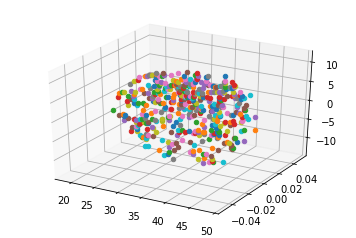

In [9]:
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (0,len(sMhit)):
    pl3dsurf.scatter(sMhit[i][0],sMhit[i][1],sMhit[i][2])
pl.show()
#for center mirror at y = 0

In [10]:
#NOW for center mirror at ymax, y = +25
coeffmirr = [31.75,25.4,19.05]
originmirrMAX = [32.075,25,0]
sMhitMAX,sVhitMAX,sMmissMAX,sVmissMAX = IntM(spM,vM,coeffmirr,originmirrMAX)

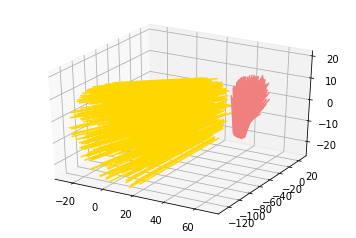

In [11]:
#max
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (0,len(spM)):
    x,y,z = ML(spM[i], vM[i], 100) #global
    pl3dsurf.plot(x,y,z, color = 'gold')
for i in range(0,len(sMhitMAX)):
    x,y,z = ML(sMhitMAX[i],sVhitMAX[i],100)
    pl3dsurf.plot(x,y,z,color = 'lightcoral')
for i in range (0,len(sMmissMAX)):
    x,y,z = ML(sMmissMAX[i], sVmissMAX[i],200)
    pl3dsurf.plot(x,y,z,color = 'mediumturquoise')
pl.show()

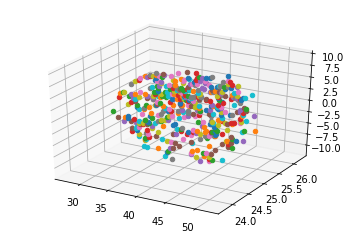

In [12]:
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (0,len(sMhitMAX)):
    pl3dsurf.scatter(sMhitMAX[i][0],sMhitMAX[i][1],sMhitMAX[i][2])
pl.show()
#for max mirror at y = 25

In [13]:
#NOW for center mirror at ymin, y = -25
coeffmirr = [31.75,25.4,19.05]
originmirrMIN = [32.075,-25,0]
sMhitMIN,sVhitMIN,sMmissMIN,sVmissMIN = IntM(spM,vM,coeffmirr,originmirrMIN)

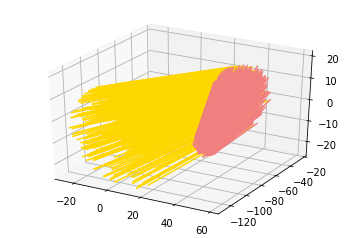

In [14]:
#using spM and vM to test functions written in this notebook
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (0,len(spM)):
    x,y,z = ML(spM[i], vM[i], 100) #global
    pl3dsurf.plot(x,y,z, color = 'gold')
for i in range(0,len(sMhitMIN)):
    x,y,z = ML(sMhitMIN[i],sVhitMIN[i],100)
    pl3dsurf.plot(x,y,z,color = 'lightcoral')
for i in range (0,len(sMmissMIN)):
    x,y,z = ML(sMmissMIN[i], sVmissMIN[i],100)
    pl3dsurf.plot(x,y,z,color = 'mediumturquoise')
pl.show()

In [15]:
#now follow trail to end (E7) with reflection off mirror at y = 0
sMhit,sVhit,sMmiss,sVmiss = IntM(spM,vM,coeffmirr,originmirr) #in global

#pathReflect (see pg 6)
spMr,vMr = RT(sMhit,sVhit,thet,originG,thet,origin4) #from Global Mirror to Local 4
points4M,vects4M = RSEPCNi(coeffellipse,spMr,vMr,range4,center4) #reflection off of E4 (from mirror)
sp4,v4 = RT(points4M,vects4M,thet,origin4,thet5,origin5) #from Local 4 to Local 5
points54,vects54 = RSEPCNi(coeffellipse56,sp4,v4,range5,center5) #reflection off of E5 (from E4)
sp5,v5 = RT(points54,vects54,thet5,origin5,thet7,origin7) #from Local 5 to Local 7
points75,vects75 = RSEPCNi(coeffellipse7,sp5,v5,range7,center7)


#points23,vects23 = RSEPCNi(coeffellipse,sp3,v3,range2,center2) #Reflection off of E2 (from 3)
#sp2,v2 = RT(points23,vects23,thet,origin2,thet6,origin6) #from Local 2 to Local 6
#points62,vects62 = RSEPCNi(coeffellipse56,sp2,v2,range6,center6) #reflection off of E6 (from 2)
#sp6,v6 = RT(points62,vects62,thet6,origin6,thet7,origin7) #from Local 6 to Local 7
#points76,vects76 = RSEPCNi(coeffellipse7,sp6,v6,range7,center7) #Reflection off of E7 (from 6)
#p7,v7 = RT(points76,vects76,thet7,origin7,thet,originG) #from Local 7 to Global
#outputpoints = PLINT(40,p7,v7)
print('Continue')

Continue


In [16]:
p4m,v4m = RT(points4M,vects4M,thet,origin4,thet,originG) #global
p54,v54 = RT(points54,vects54,thet5,origin5,thet,originG) #global
p7,v7 = RT(points75,vects75,thet7,origin7,thet, originG)

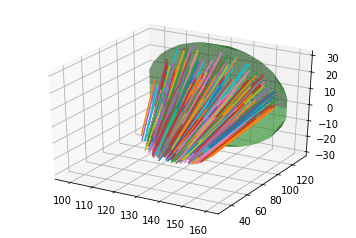

In [17]:
#plotting in global bc wtf why isn't it working
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X5,Y5,Z5, linewidth = .2, antialiased=True, color = 'forestgreen',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X6,Y6,Z6, linewidth = .2, antialiased=True, color = 'forestgreen',alpha=0.7) #GLOBAL
for i in range (0,len(p54)):
    x,y,z = ML(p54[i],v54[i],100)
    pl3dsurf.plot(x,y,z)
pl.show()
#REFLECTION OFF OF E5 MAKES SENSE IN LOCAL 5
#OK SO THIS MAKES SENSE WHY IS THE OTHER ONE NOT WORKING!?
#OMG I WAS JUST GETTING IT WRONG BECAUSE OF PERSPECTIVE I HATE MYSELF

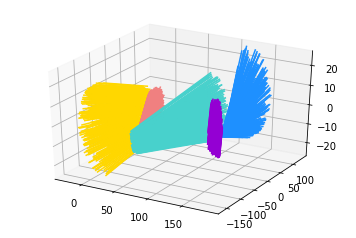

In [18]:
#Testing pathR
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (0,len(spM)):
    x,y,z = ML(spM[i], vM[i], 100) #global
    pl3dsurf.plot(x,y,z, color = 'gold')
for i in range(0,len(sMhit)):
    x,y,z = ML(sMhit[i],sVhit[i],100)
    pl3dsurf.plot(x,y,z,color = 'lightcoral')
for i in range (0,len(p4m)):
    x,y,z = ML(p4m[i], v4m[i],200)
    pl3dsurf.plot(x,y,z,color = 'mediumturquoise')
for i in range(0,len(p54)):
    x,y,z = ML(p54[i],v54[i],200)
    pl3dsurf.plot(x,y,z, color = 'dodgerblue')
for i in range(0,len(p7)):
    x,y,z = ML(p7[i],v7[i],20)
    pl3dsurf.plot(x,y,z, color = 'darkviolet')
pl.show()

pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (0,len(p7)):
    pl3dsurf.scatter(p7[i][0],p7[i][1],p7[i][2])
pl3dsurf.plot_trisurf(X7,Y7,Z7, linewidth = .2, antialiased=True, color = 'deepskyblue',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X8,Y8,Z8, linewidth = .2, antialiased=True, color = 'deepskyblue',alpha=0.7) #GLOBAL
pl.show()
#intersection with E7? 